# 신경망 모델에서 옵티마이저 사용법
### - 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- 표준정규분포로 스케일링한 데이터

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

### 1. Adam optimizer

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
# 모델 정의 
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- Adam 하이퍼 파라메터

In [7]:
from tensorflow.keras.optimizers import Adam
adam = Adam(
    learning_rate=0.001,        # learning_rate: 0보다 크거나 같은 float 값. 학습률.
    beta_1=0.9,                 # beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됨
    beta_2=0.999,               # beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됨
    epsilon=None,               # epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됨
    decay=0.0,                  # decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율
    amsgrad=False               # amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정함
)

In [9]:
# model compile
model.compile(adam, 'binary_crossentropy', ['accuracy'])

In [10]:
# model 학습
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=50, verbose=0)

In [11]:
# model 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1117 - accuracy: 0.9825


[0.11167240142822266, 0.9824561476707458]

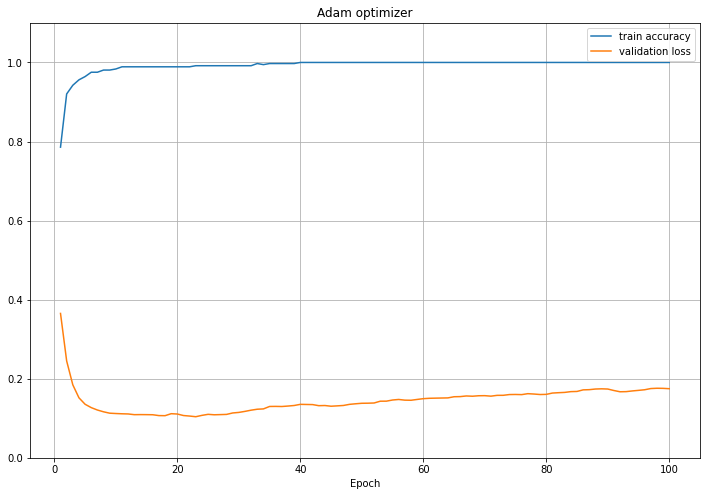

In [12]:
# 시각화
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')
plt.show()

### 2. RMSProp optimizer

In [13]:
# 모델 정의 
model2 = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- RMSProp Hyper Parameter

In [14]:
from tensorflow.keras.optimizers import RMSprop
rmsp = RMSprop(
    learning_rate=0.001,            # 학습률.
    rho=0.9,                        # rho: 0보다 크거나 같은 float 값.
    epsilon=None,                   # epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됨
    decay=0.0                       # 학습률의 감소율
)

In [15]:
# model compile
model2.compile(adam, 'binary_crossentropy', ['accuracy'])

In [16]:
# model 학습
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=100, batch_size=50, verbose=0)

In [18]:
# model 평가
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1488 - accuracy: 0.9649


[0.14884865283966064, 0.9649122953414917]

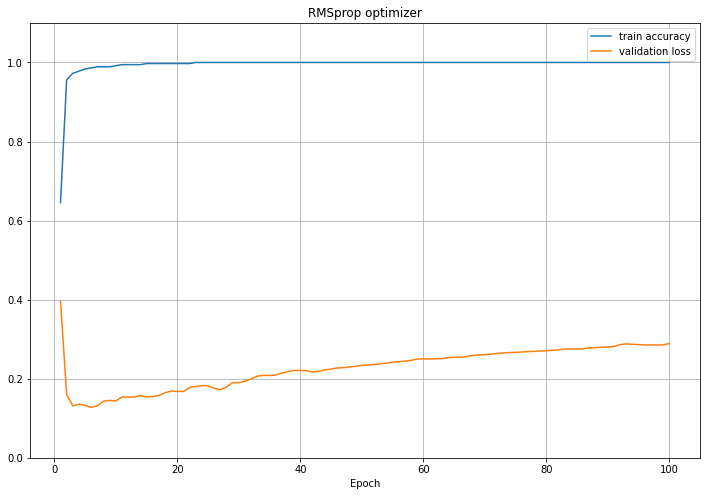

In [19]:
# 시각화
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSprop optimizer')
plt.show()

- 2가지 옵티마이저 비교

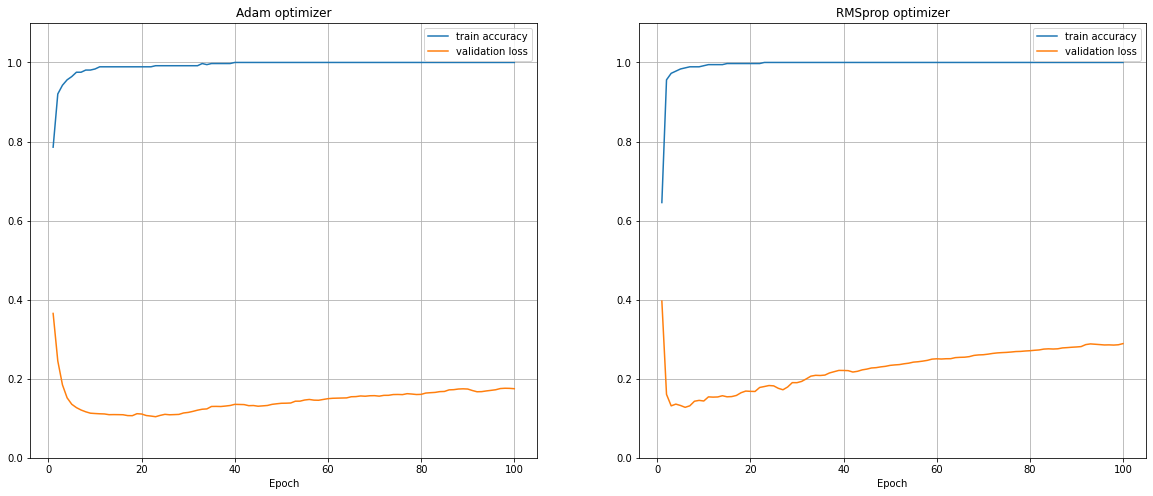

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')

plt.subplot(122)
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSprop optimizer')

plt.show()